# Finding the Best Markets to Advertise In

#### Darren Ho

Let's assume that we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in. 

## Understanding the Data

To save money, we can try to search existing data that might be relevant for our purpose, rather than organizing surveys for a couple of different markets to find out which is the best choice for advertising.

One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. They also run a popular [Medium publication](https://www.freecodecamp.org/news/), which attracted new coders with varying interests, and is ideal for the purpose of our analysis. 

Data is publicly available [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_coder = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)  # low_memory = False to silence dtypes warning
new_coder.shape

(18175, 136)

In [2]:
new_coder.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Running `.shape`, we see that the dataset has 18175 rows and 136 columns. We also ran `.head` to get a look at the first five rows of the dataset. 

## Checking for Sample Representativity

Most of the courses we offer are on web and mobile development, but we also cover many other domains. For the purpose of the analysis, we want to answer questions about a *population* of new coders that are interested in the subjects we teach. We would like to know:

- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

However, before we start analyzing the sample data we have, we need to clarify that it is representative for our population of interest and that it has the right categories of people for our purpose. 

In [3]:
# freq dist table - percentage over abs freq

new_coder['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The most popular role that the sample is interested in working in is `Full-Stack Web Developer` at approximately 12%, followed by `Front-End Web Developer` and `Data Scientist` at 6.4% and 2.2% respectively. Looking closer, a lot of people are interested in more than one subject. We also see that more people are interested in web development compared to mobile development.     

In [4]:
# Split each string in the 'JobRoleInterest' column
jri_no_nulls = new_coder['JobRoleInterest'].dropna()
jri_split = jri_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = jri_split.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Looking at the frequency table above, we see that approximately 32% of the sample know clearly what role/job that they would be interested working in. Approximately 16% of the sample listed 3 roles/job that they were interested in, followed by 15% who have listed 4 roles/job.   

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


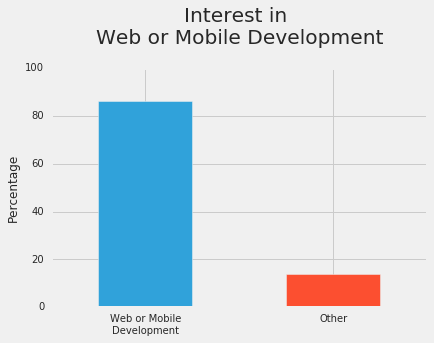

In [5]:
# Frequency table
web_mobile = jri_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title('Interest in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or Mobile\nDevelopment', 'Other'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

86% of the sample is interested in web or mobile devlopment, whereas the remaining 14% is interesting in other roles/jobs that we have labeled `Other`. We can better visualize the drastic difference in the bar plot above. With that being said, we can conclude that the sample is a good representation of our population of interest.

## New Coders - Location and Densities

We can start finding out where these new coders are located, and what are the densities for each location. We'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested in where people are located, not where they were born.  

In [6]:
# drop all rows where particpants didnt answer what role they are interested in
nonNA_coder = new_coder[new_coder['JobRoleInterest'].notnull()].copy()

abs_freq = nonNA_coder['CountryLive'].value_counts()
rel_freq = round(nonNA_coder['CountryLive'].value_counts(normalize=True)*100,3)

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': abs_freq, 
                     'Relative Freq(%)': rel_freq}
            )

,Absolute frequency,Relative Freq(%)
United States of America,3125,45.700
India,528,7.722
United Kingdom,315,4.607
Canada,260,3.802
Poland,131,1.916
Brazil,129,1.887
Germany,125,1.828
Australia,112,1.638
Russia,102,1.492
Ukraine,89,1.302


First, we made sure that we were working with a representative sample by dropping all the rows where particpants did not answer what role they were interested in. We then generated a frequency table for the `CountryLive` variable - both absolute and relative frequencies.

Looking at the results, we see that the US dominates in terms of where each particpant lives in at a significant 45.7%. The next country with the highest relative frequency is India, at a much lower percentage of 7.7%. So based on the table, the US and India are the two markets I'd choose for advertisement. 

## Spending Money for Learning

We found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring how how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. 

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. We're interested in finding out how much money each student spends per month. 

We'll narrow down our analysis to the top four markets: US, India, UK, and Canada because:

- They have the highest absolute frequencies in our sample
- Our courses are written in English, and English is an official language in these four countries

In [7]:
nonNA_coder['MonthsProgramming'].replace(0, 1, inplace = True)   # replace value of 0 with 1

nonNA_coder['per_month'] = nonNA_coder['MoneyForLearning'] / nonNA_coder['MonthsProgramming']
nonNA_coder['per_month'].isnull().sum()     # counting NAs

675

In [8]:
# drop NAs from the new per_month column

nonNA_coder = nonNA_coder[nonNA_coder['per_month'].notnull()]
nonNA_coder['per_month'].isnull().sum()     # counting NAs, make sure its 0

0

In [9]:
# drop NAs from CountryLive column

print(nonNA_coder['CountryLive'].isnull().sum())   # counting NAs
nonNA_coder = nonNA_coder[nonNA_coder['CountryLive'].notnull()]
print(nonNA_coder['CountryLive'].isnull().sum())     # counting NAs, make sure its 0

105
0


In [10]:
country_mean = nonNA_coder.groupby('CountryLive').mean()
country_mean['per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: per_month, dtype: float64

We started by creating a new column, `per_month`, that describes the amount of money a student has spent per month. Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey), so we replaced all values of 0 with 1 to avoid diving by 0.  

We then counted the amount of null values in the new column and cleaned it so that we kept the rows with values (did so for `CountryLive` as well). We then grouped the remaining data by the `CountryLive` column and found the mean amount a student spends on average each month in the four biggest markets. 

We found that the US spent the most at approximately \$228 per month, followed by India, Canada and then the UK at approximately \$135, \$114, and \$46, respectively. 

The results for the UK and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics, like GDP per capita, we would expect people in the UK and Canada to spend more on learning than people in India.

It might be that we do not have enough representative data for the UK, Canada and India, or that we have some outliers skewing the data for those countries. It may even be that the results are correct. Let's take a look

## Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


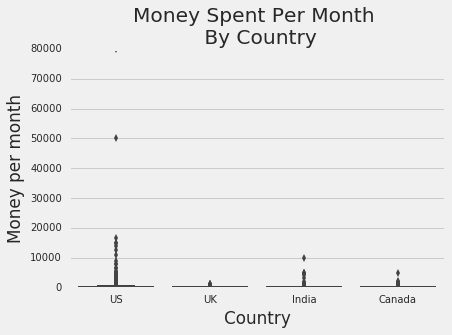

In [11]:
# filter dataset so only contains countries of interest
top4markets = nonNA_coder[nonNA_coder['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# create boxplots

sns.boxplot(x='CountryLive', y='per_month', data= top4markets)
plt.title('Money Spent Per Month \n By Country')
plt.ylabel('Money per month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We generated four box plots to visualize the distribution of the variable that describes how much money each participant had spent per month. We can see spot the obvious outliers in the distribution of the US, and somewhat for India. Its hard to tell for the distributions of the UK and Canada.

We'll eliminate the extreme outliers by removing any particpant who spends more than \$10,000 per month.

In [12]:
# filter out participants who spend more than 10k per month
nonNA_coder = nonNA_coder[nonNA_coder['per_month'] < 10000]

In [13]:
# Recompute mean sum of money spent by students each month

country_mean = nonNA_coder.groupby('CountryLive').mean()
country_mean['per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    155.459187
India                       113.748387
Canada                      113.510961
United Kingdom               45.534443
Name: per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


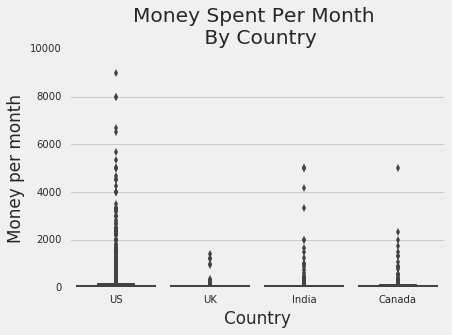

In [14]:
# filter dataset so only contains countries of interest
top4markets = nonNA_coder[nonNA_coder['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# create boxplots

sns.boxplot(x='CountryLive', y='per_month', data= top4markets)
plt.title('Money Spent Per Month \n By Country')
plt.ylabel('Money per month')
plt.xlabel('Country')
plt.ylim(0,10000)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

After eliminating some of the extreme outliers above \$10,000, we then recomputed the mean values from before, and then found that the distributions still shown signs of outliers. Let's isolate some of those respondents and examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified.

In [15]:
top4markets.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,per_month
count,3866.000000,3889.000000,255.000000,257.000000,257.000000,611.000000,217.0,25.0,376.0,46.0,...,1463.0,244.0,631.0,561.0,264.0,808.0,85.0,43.0,646.0,3906.000000
mean,28.223487,0.066855,0.529412,0.334630,0.770428,1.906710,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,140.096420
std,8.989643,0.249803,0.500116,0.472782,0.421378,0.974833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555.236533
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
50%,27.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.846591
75%,33.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,37.500000
max,71.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9000.000000


In [16]:
top4markets['AttendedBootcamp'].value_counts()

0.0    3629
1.0     260
Name: AttendedBootcamp, dtype: int64

We see that there is an `AttendedBootcamp` column that is binary: `0` indicates the individual did not attend boot camp & `1` indicates that they did. Let's look a bit further. 

In [17]:
attended = top4markets[top4markets['AttendedBootcamp'] == 1]
attended['per_month'].describe()

count     260.000000
mean     1031.457503
std      1459.192236
min         0.000000
25%        82.500000
50%       500.000000
75%      1297.619048
max      9000.000000
Name: per_month, dtype: float64

In [18]:
didnt_attend = top4markets[top4markets['AttendedBootcamp'] == 0]
didnt_attend['per_month'].describe()

count    3629.000000
mean       76.835568
std       344.673638
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      5000.000000
Name: per_month, dtype: float64

We isolated those who attended a bootcamp and those who didn't. For those that attended, we found that the average amount spent per month is approximately \$1,031 versus the approximate \$77 we found for those that didn't attend. This large discrepency may explain the outliers as the average amount spent by those who attended a bootcamp skews our overall mean significantly. Let's remove the bootcamp-goers from our dataset and see how our results will reflect that change. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


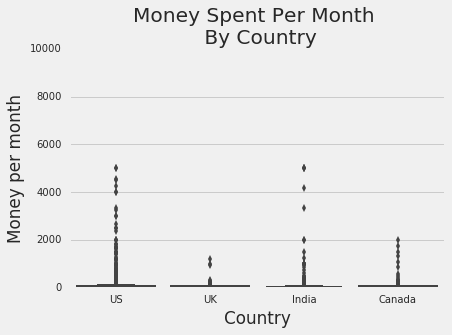

In [19]:
# create boxplots

sns.boxplot(x='CountryLive', y='per_month', data= didnt_attend)
plt.title('Money Spent Per Month \n By Country')
plt.ylabel('Money per month')
plt.xlabel('Country')
plt.ylim(0,10000)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Removing those who have attended a bootcamp has helped, but we still notice some outliers, specifically in India. We'll eliminate the outliers by filtering out the partipants that spend over \$2,000

In [ ]:
# Examine India data points at 2000 or above
india_outliers = didnt_attend[(didnt_attend['CountryLive'] == 'India') & (didnt_attend['per_month'] >= 2000)]

# Remove the extreme outliers for Canada
no_india_outliers = didnt_attend.drop(india_outliers.index)

no_india_outliers['per_month'].describe()

count    3622.000000
mean       69.667663
std       298.841887
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      5000.000000
Name: per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


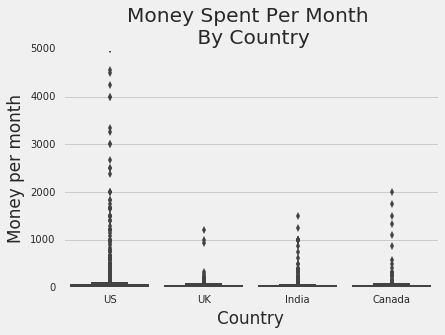

In [ ]:
# create boxplots

sns.boxplot(x='CountryLive', y='per_month', data= no_india_outliers)
plt.title('Money Spent Per Month \n By Country')
plt.ylabel('Money per month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two Best Markets

After eliminating the extreme outliers, we found the following mean values:

In [ ]:
country_mean = no_india_outliers.groupby('CountryLive').mean()
country_mean['per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    76.350634
Canada                      64.127841
India                       53.923528
United Kingdom              34.468329
Name: per_month, dtype: float64

In [ ]:
# Frequency table for the 'CountryLive' column
no_india_outliers['CountryLive'].value_counts(normalize = True) * 100

United States of America    73.826615
India                       12.313639
United Kingdom               7.509663
Canada                       6.350083
Name: CountryLive, dtype: float64

Considering the results we have found so far, one country we should definitely advertise in is the `US`. The second country comes down to either `Canada` or `India`. Based on the country means, we would go with `Canada` as we found out they spent the second most per month on average. However, when we check the relative frequency table, we find that `India` has the second largest share of the sample in terms of where the respondents are from, whereas `Canada` has the lowest of the four countries.

## Conclusion

The US will definitely be one of the countries to be advertised in as the results are just overwhelmingly pointing at such. As for the second market, it isn't as cut and dry. Some options we have in choosing the other markets to advertise in:

- Advertise in more than two countries
- Split the advertising budget unequally (70% to advertise in the US, 30% to advertise in the second market or split to advertise in 3)
- Advertise only in the US
- Assuming we have a marketing team at the company, send them our results and let them use their knowledge to choose the best decision

## Next Steps

- Find other criteria for choosing the best market
- Analyze other datasets:
    - [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey)
    - [Stack Overflow 20018 Developer Survey](https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey)